<a href="https://colab.research.google.com/github/ethann0904/ethann0904/blob/main/EthanNgo_MSMachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving conversion_predictors_of_clinically_isolated_syndrome_to_multiple_sclerosis.csv to conversion_predictors_of_clinically_isolated_syndrome_to_multiple_sclerosis.csv


In [ ]:
import io
df2 = pd.read_csv(io.BytesIO(uploaded['conversion_predictors_of_clinically_isolated_syndrome_to_multiple_sclerosis.csv']))
# Dataset is now stored in a Pandas Dataframe

In [ ]:
df2.head()

,Unnamed: 0,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
0,0,1,34,20.0,1,1,2.0,1,0,1,1,0,0,0,1,0,1,1.0,1.0,1
1,1,1,61,25.0,3,2,10.0,2,1,1,0,1,0,0,0,0,1,2.0,2.0,1
2,2,1,22,20.0,3,1,3.0,1,1,0,0,0,0,0,1,0,0,1.0,1.0,1
3,3,2,41,15.0,1,1,7.0,2,1,0,1,1,0,1,1,0,0,1.0,1.0,1
4,4,2,34,20.0,2,1,6.0,2,0,1,0,0,0,1,0,0,0,1.0,1.0,1


In [ ]:
df2.tail()

,Unnamed: 0,Gender,Age,Schooling,Breastfeeding,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,Initial_EDSS,Final_EDSS,group
268,268,2,31,8.0,3,1,9.0,2,0,0,0,0,0,0,0,0,0,NaN,NaN,2
269,269,1,21,15.0,3,3,5.0,2,1,0,0,0,0,0,0,0,1,NaN,NaN,2
270,270,2,19,12.0,3,3,13.0,2,0,1,1,1,0,0,0,0,1,NaN,NaN,2
271,271,2,32,15.0,3,3,15.0,2,1,1,1,1,0,1,1,1,0,NaN,NaN,2
272,272,2,77,6.0,3,3,2.0,1,0,0,1,0,0,0,0,0,0,NaN,NaN,2


In [ ]:
df2.group.value_counts(normalize = True)

2    0.542125
1    0.457875
Name: group, dtype: float64

In [ ]:
df_filtered = df2.drop(['Initial_EDSS', 'Final_EDSS', 'Age', 'Breastfeeding', 'Schooling'], axis=1) #dropping columns that do not contain biological/neurological variables
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html

In [ ]:
df_filtered

,Unnamed: 0,Gender,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,group
0,0,1,1,2.0,1,0,1,1,0,0,0,1,0,1,1
1,1,1,2,10.0,2,1,1,0,1,0,0,0,0,1,1
2,2,1,1,3.0,1,1,0,0,0,0,0,1,0,0,1
3,3,2,1,7.0,2,1,0,1,1,0,1,1,0,0,1
4,4,2,1,6.0,2,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,268,2,1,9.0,2,0,0,0,0,0,0,0,0,0,2
269,269,1,3,5.0,2,1,0,0,0,0,0,0,0,1,2
270,270,2,3,13.0,2,0,1,1,1,0,0,0,0,1,2
271,271,2,3,15.0,2,1,1,1,1,0,1,1,1,0,2


In [ ]:
male_filtered = df_filtered[df_filtered.Gender==1]
female_filtered = df_filtered[df_filtered.Gender==2]

In [ ]:
male_filtered

,Unnamed: 0,Gender,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,group
0,0,1,1,2.0,1,0,1,1,0,0,0,1,0,1,1
1,1,1,2,10.0,2,1,1,0,1,0,0,0,0,1,1
2,2,1,1,3.0,1,1,0,0,0,0,0,1,0,0,1
5,5,1,1,6.0,2,0,1,0,0,0,1,0,1,0,1
8,8,1,1,8.0,2,0,1,1,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,255,1,3,7.0,2,2,0,0,0,0,0,0,0,0,2
256,256,1,1,2.0,1,2,0,0,0,0,0,0,0,0,2
261,261,1,1,8.0,1,2,1,1,0,0,0,0,0,1,2
264,264,1,1,1.0,1,0,0,0,0,0,1,1,1,0,2


In [ ]:
female_filtered

,Unnamed: 0,Gender,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,group
3,3,2,1,7.0,2,1,0,1,1,0,1,1,0,0,1
4,4,2,1,6.0,2,0,1,0,0,0,1,0,0,0,1
6,6,2,1,14.0,2,0,1,0,1,0,1,1,0,1,1
7,7,2,1,14.0,2,0,1,1,0,0,1,1,1,1,1
9,9,2,1,8.0,2,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,267,2,3,10.0,2,0,0,0,0,0,0,0,0,0,2
268,268,2,1,9.0,2,0,0,0,0,0,0,0,0,0,2
270,270,2,3,13.0,2,0,1,1,1,0,0,0,0,1,2
271,271,2,3,15.0,2,1,1,1,1,0,1,1,1,0,2


In [ ]:
female_filtered.drop('Unnamed: 0', axis=1, inplace=True)
female_filtered.tail()

SyntaxError: ignored

In [ ]:
female_filtered

,Gender,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,group
3,2,1,7.0,2,1,0,1,1,0,1,1,0,0,1
4,2,1,6.0,2,0,1,0,0,0,1,0,0,0,1
6,2,1,14.0,2,0,1,0,1,0,1,1,0,1,1
7,2,1,14.0,2,0,1,1,0,0,1,1,1,1,1
9,2,1,8.0,2,0,0,0,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,2,3,10.0,2,0,0,0,0,0,0,0,0,0,2
268,2,1,9.0,2,0,0,0,0,0,0,0,0,0,2
270,2,3,13.0,2,0,1,1,1,0,0,0,0,1,2
271,2,3,15.0,2,1,1,1,1,0,1,1,1,0,2


In [ ]:
female_filtered['Initial_Symptom'] = female_filtered['Initial_Symptom'].fillna(female_filtered['Initial_Symptom'].mode()[0])

<ipython-input-18-729167657df6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_filtered['Initial_Symptom'] = female_filtered['Initial_Symptom'].fillna(female_filtered['Initial_Symptom'].mode()[0])


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X = female_filtered.iloc[:,:-1]
y = female_filtered.iloc[:,-1]

In [ ]:
X

,Gender,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI
3,2,1,7.0,2,1,0,1,1,0,1,1,0,0
4,2,1,6.0,2,0,1,0,0,0,1,0,0,0
6,2,1,14.0,2,0,1,0,1,0,1,1,0,1
7,2,1,14.0,2,0,1,1,0,0,1,1,1,1
9,2,1,8.0,2,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,2,3,10.0,2,0,0,0,0,0,0,0,0,0
268,2,1,9.0,2,0,0,0,0,0,0,0,0,0
270,2,3,13.0,2,0,1,1,1,0,0,0,0,1
271,2,3,15.0,2,1,1,1,1,0,1,1,1,0


In [ ]:
y

3      1
4      1
6      1
7      1
9      1
      ..
267    2
268    2
270    2
271    2
272    2
Name: group, Length: 168, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test =train_test_split(X, y,test_size=0.3, random_state=0, stratify=y)


In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
scaler = StandardScaler()


In [ ]:
X_train = scaler.fit_transform(X_train)


In [ ]:
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn import metrics


In [ ]:
forest = RandomForestClassifier()


In [ ]:
forest.fit(X_train, y_train)


RandomForestClassifier()

In [ ]:
print(forest.feature_importances_)


[0.         0.06822986 0.17864545 0.02439067 0.08167088 0.04074682
 0.04492153 0.0374267  0.01794764 0.33050842 0.03071259 0.10328863
 0.04151082]


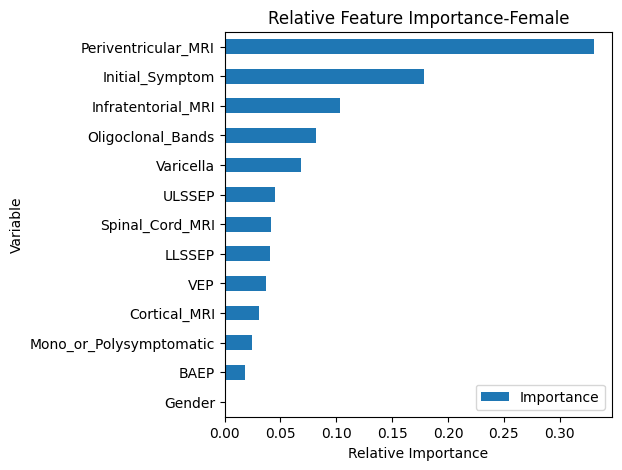

In [ ]:
df_imp_female = pd.DataFrame({'Importance': list(forest.feature_importances_)}, index=X.columns)
df_imp_sorted_female = df_imp_female.sort_values(by=('Importance'), ascending=True)
df_imp_sorted_female.plot.barh(figsize=(5,5))
plt.title('Relative Feature Importance-Female')
plt.xlabel('Relative Importance')
plt.ylabel('Variable')
plt.legend(loc=4)
plt.show()

In [ ]:
forest_pred = forest.predict(X_test)


In [ ]:
cm = pd.DataFrame(confusion_matrix(y_test, forest_pred))
cm['Total'] = np.sum(cm, axis=1)
cm = cm.append(np.sum(cm, axis=0), ignore_index=True)
cm.columns = ['Predicted No', 'Predicted Yes', 'Total']
cm = cm.set_index([['Actual No', 'Actual Yes', 'Total']])
print(cm)

            Predicted No  Predicted Yes  Total
Actual No             15              4     19
Actual Yes             9             23     32
Total                 24             27     51


<ipython-input-32-b8dd66d1173e>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cm = cm.append(np.sum(cm, axis=0), ignore_index=True)


In [ ]:
target_names = ['CDMS', 'Non-CDMS']
print(classification_report(y_test, forest_pred, target_names=target_names))

              precision    recall  f1-score   support

        CDMS       0.62      0.79      0.70        19
    Non-CDMS       0.85      0.72      0.78        32

    accuracy                           0.75        51
   macro avg       0.74      0.75      0.74        51
weighted avg       0.77      0.75      0.75        51



Starting code for male only data



In [ ]:
male_filtered

,Unnamed: 0,Gender,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,group
0,0,1,1,2.0,1,0,1,1,0,0,0,1,0,1,1
1,1,1,2,10.0,2,1,1,0,1,0,0,0,0,1,1
2,2,1,1,3.0,1,1,0,0,0,0,0,1,0,0,1
5,5,1,1,6.0,2,0,1,0,0,0,1,0,1,0,1
8,8,1,1,8.0,2,0,1,1,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,255,1,3,7.0,2,2,0,0,0,0,0,0,0,0,2
256,256,1,1,2.0,1,2,0,0,0,0,0,0,0,0,2
261,261,1,1,8.0,1,2,1,1,0,0,0,0,0,1,2
264,264,1,1,1.0,1,0,0,0,0,0,1,1,1,0,2


In [ ]:
male_filtered.drop('Unnamed: 0', axis=1, inplace=True)
male_filtered.tail()

<ipython-input-35-a893e544f241>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_filtered.drop('Unnamed: 0', axis=1, inplace=True)


,Gender,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI,group
255,1,3,7.0,2,2,0,0,0,0,0,0,0,0,2
256,1,1,2.0,1,2,0,0,0,0,0,0,0,0,2
261,1,1,8.0,1,2,1,1,0,0,0,0,0,1,2
264,1,1,1.0,1,0,0,0,0,0,1,1,1,0,2
269,1,3,5.0,2,1,0,0,0,0,0,0,0,1,2


In [ ]:
male_filtered['Initial_Symptom'] = male_filtered['Initial_Symptom'].fillna(male_filtered['Initial_Symptom'].mode()[0])

<ipython-input-36-9506a856f2a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_filtered['Initial_Symptom'] = male_filtered['Initial_Symptom'].fillna(male_filtered['Initial_Symptom'].mode()[0])


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X_male = male_filtered.iloc[:,:-1]
y_male = male_filtered.iloc[:,-1]

In [ ]:
X_male

,Gender,Varicella,Initial_Symptom,Mono_or_Polysymptomatic,Oligoclonal_Bands,LLSSEP,ULSSEP,VEP,BAEP,Periventricular_MRI,Cortical_MRI,Infratentorial_MRI,Spinal_Cord_MRI
0,1,1,2.0,1,0,1,1,0,0,0,1,0,1
1,1,2,10.0,2,1,1,0,1,0,0,0,0,1
2,1,1,3.0,1,1,0,0,0,0,0,1,0,0
5,1,1,6.0,2,0,1,0,0,0,1,0,1,0
8,1,1,8.0,2,0,1,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,1,3,7.0,2,2,0,0,0,0,0,0,0,0
256,1,1,2.0,1,2,0,0,0,0,0,0,0,0
261,1,1,8.0,1,2,1,1,0,0,0,0,0,1
264,1,1,1.0,1,0,0,0,0,0,1,1,1,0


In [ ]:
y_male

0      1
1      1
2      1
5      1
8      1
      ..
255    2
256    2
261    2
264    2
269    2
Name: group, Length: 105, dtype: int64

In [ ]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_male, y_male,test_size=0.3, random_state=0, stratify=y_male)


In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
scaler = StandardScaler()


In [ ]:
X_train_1 = scaler.fit_transform(X_train_1)


In [ ]:
X_test_1 = scaler.transform(X_test_1)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn import metrics


In [ ]:
forest_1 = RandomForestClassifier()


In [ ]:
forest_1.fit(X_train_1, y_train_1)


RandomForestClassifier()

In [ ]:
print(forest_1.feature_importances_)


[0.         0.11414792 0.24674837 0.05145802 0.1053531  0.05987677
 0.03969123 0.03924641 0.03190498 0.06408647 0.07976531 0.12306753
 0.04465387]


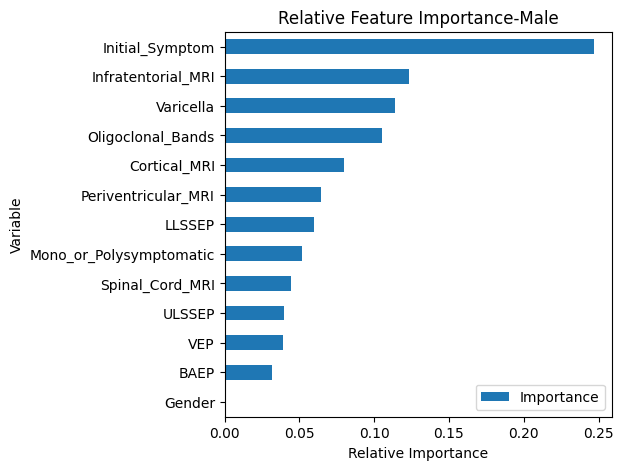

In [ ]:
df_imp_male = pd.DataFrame({'Importance': list(forest_1.feature_importances_)}, index=X.columns)
df_imp_sorted_male = df_imp_male.sort_values(by=('Importance'), ascending=True)
df_imp_sorted_male.plot.barh(figsize=(5,5))
plt.title('Relative Feature Importance-Male')
plt.xlabel('Relative Importance')
plt.ylabel('Variable')
plt.legend(loc=4)
plt.show()